# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Removing or hiding warnings
import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**

In [2]:
df = pd.read_csv("/kaggle/input/iriscsv/Iris.csv")  # Replace with actual path
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Exploratory Data Analysis (EDA)**

**Dataset Overview**

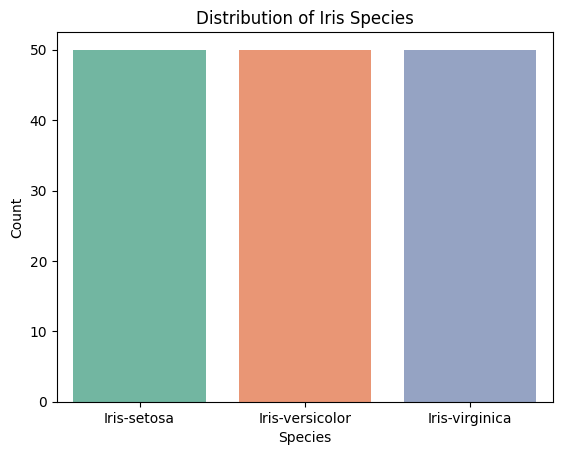

In [3]:
# View class distribution
sns.countplot(data=df, x='Species', palette='Set2')
plt.title("Distribution of Iris Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()


**Pair Plot – Feature Distribution by Class**

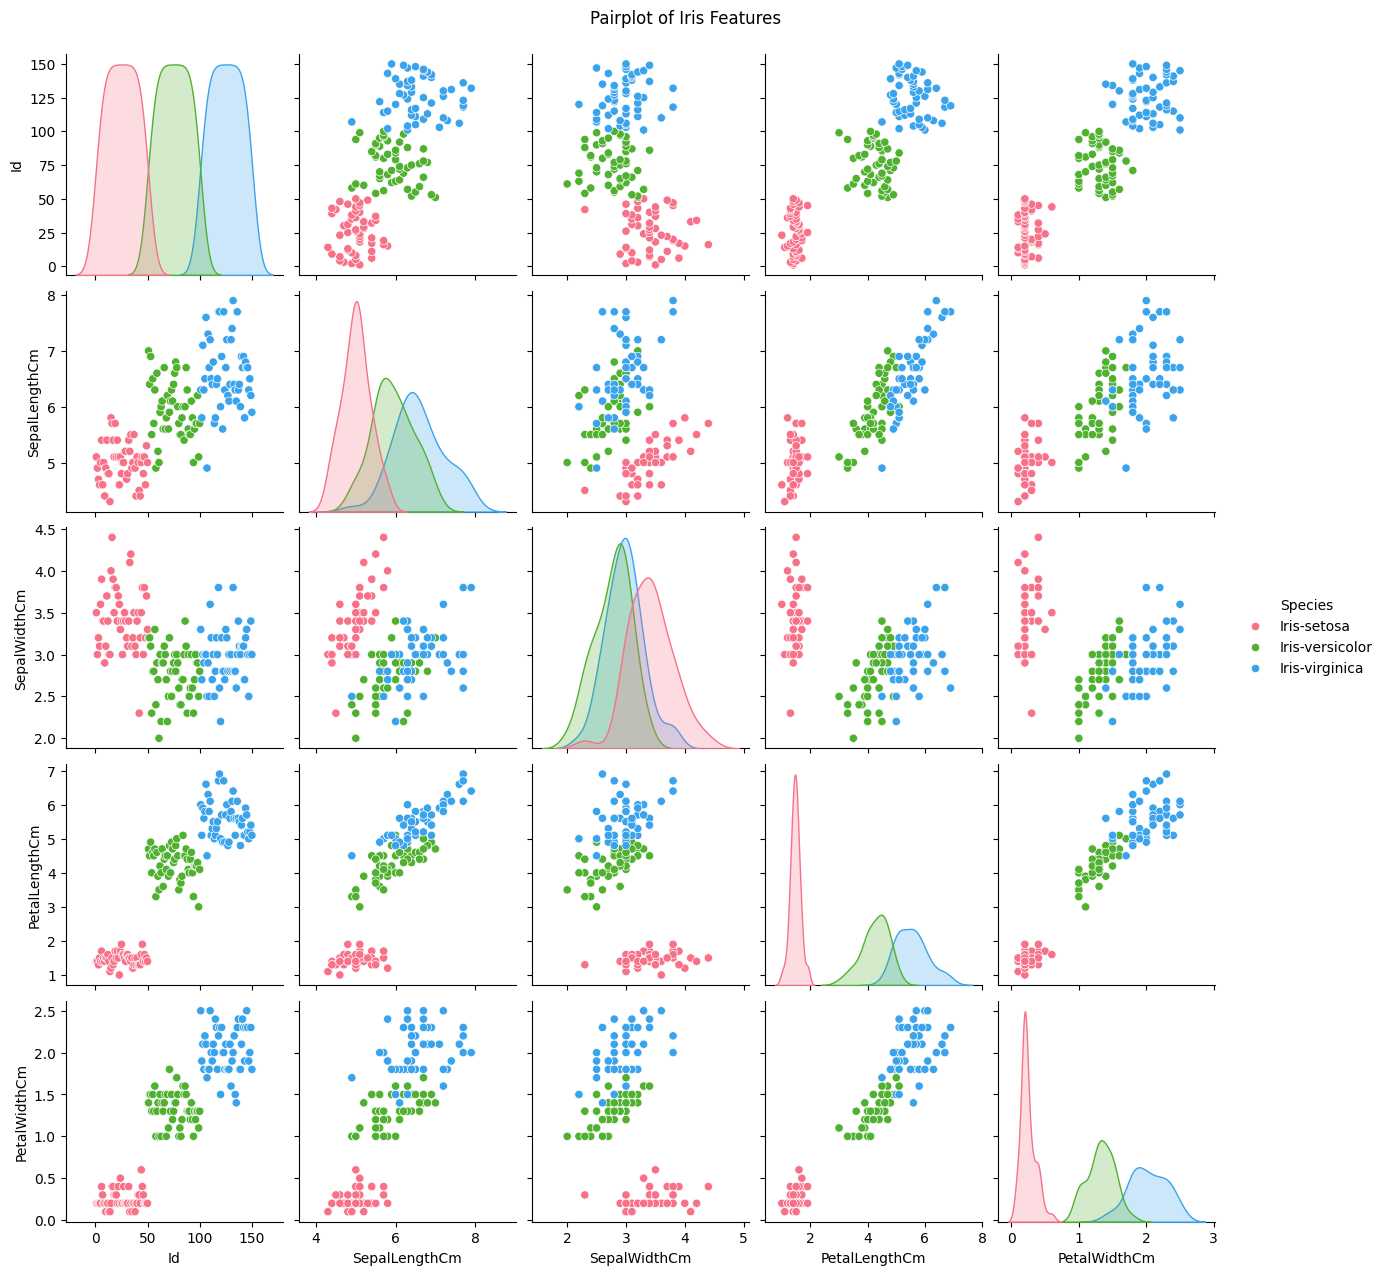

In [4]:
# Use original species labels for plotting
df_plot = pd.read_csv("/kaggle/input/iriscsv/Iris.csv")
sns.pairplot(df_plot, hue="Species", palette="husl")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


**Correlation Heatmap**

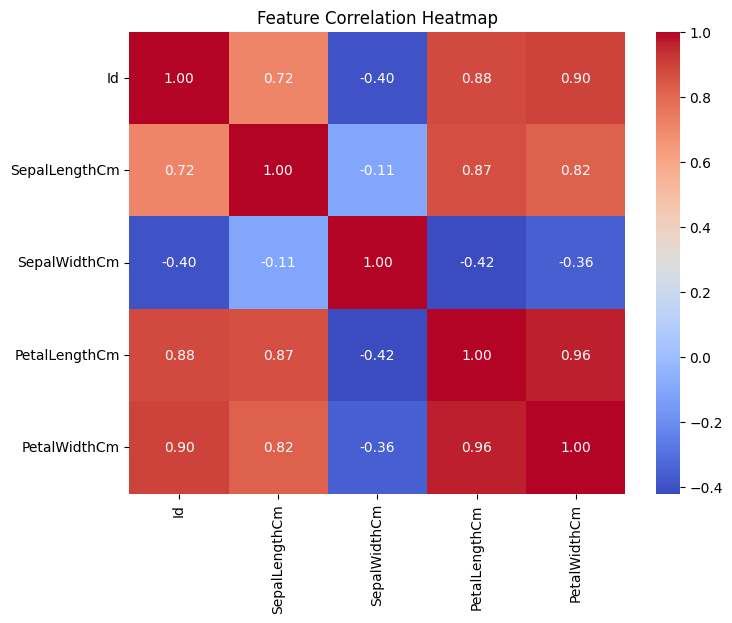

In [7]:
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=[np.number])  # Only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


**Box Plots – Feature Spread by Class**

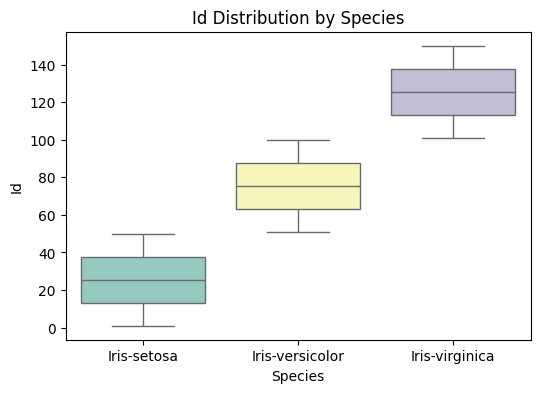

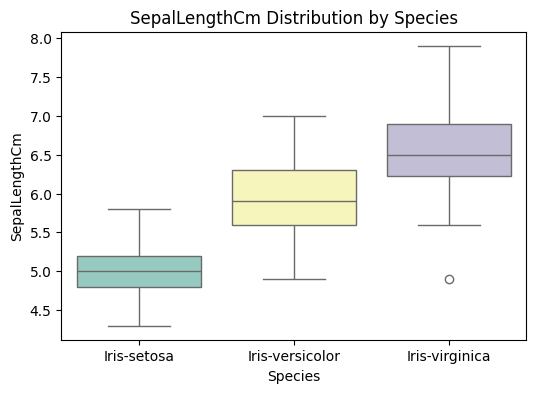

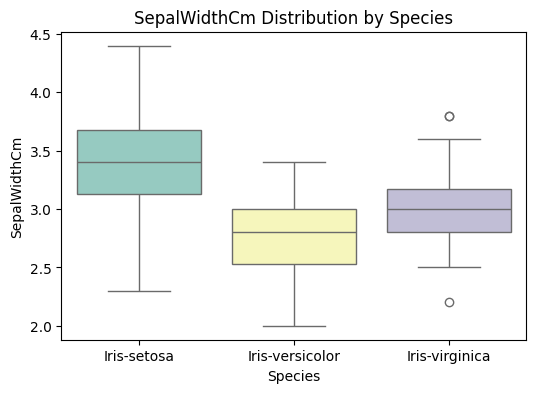

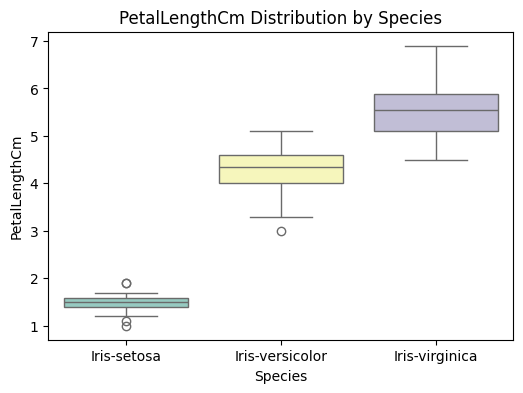

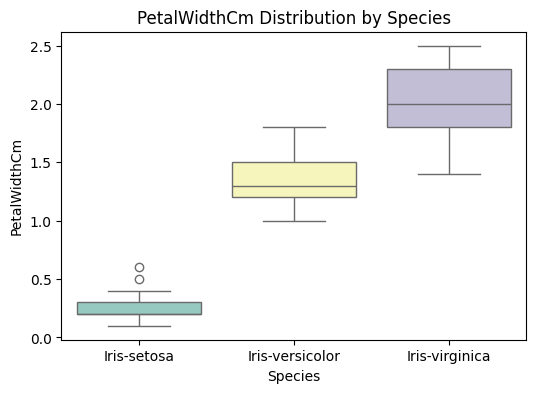

In [8]:
features = df.columns[:-1]  # all columns except 'Species'

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_plot, x='Species', y=feature, palette='Set3')
    plt.title(f"{feature} Distribution by Species")
    plt.show()


**Violin Plot (Optional but Insightful)**

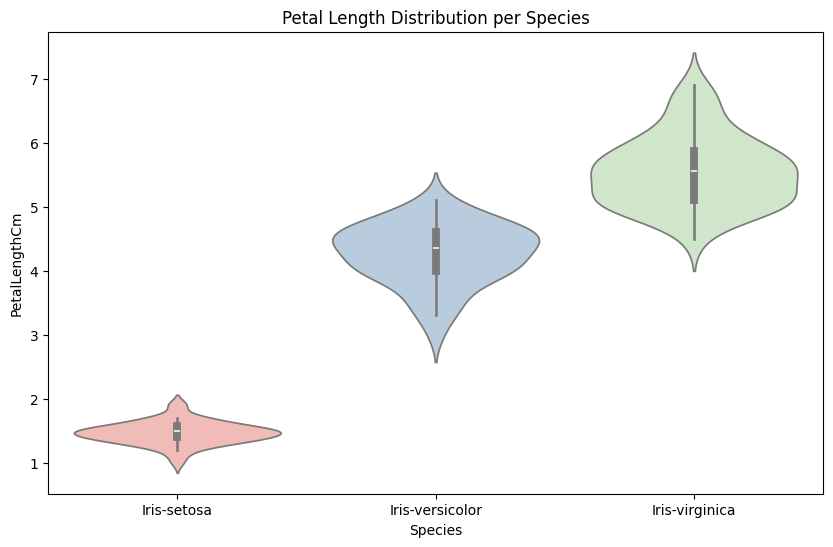

In [9]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_plot, x='Species', y='PetalLengthCm', palette='Pastel1')
plt.title("Petal Length Distribution per Species")
plt.show()

# **Preprocess Data & Train-Test Split**

In [10]:
# Drop ID column if it exists
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

# Encode labels if needed
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Features and Target
X = df.drop('Species', axis=1)
y = df['Species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Train Model**

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# **Evaluate Model**

Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



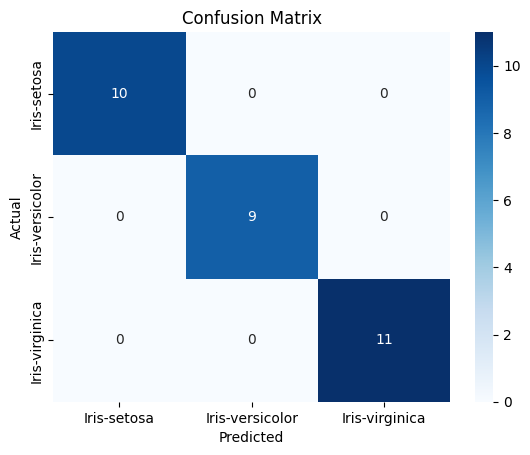

In [12]:
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **classification_report**

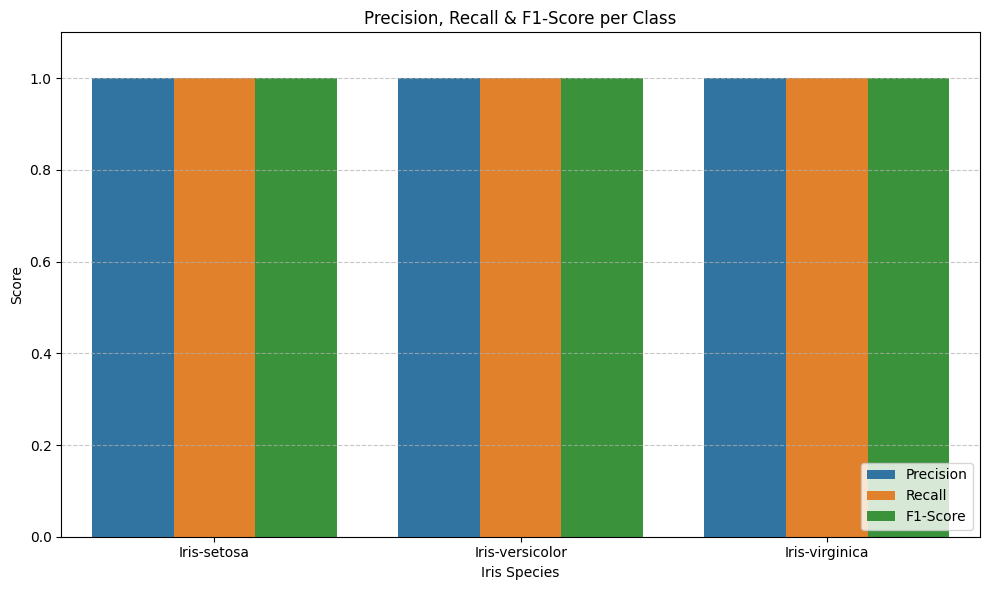

In [13]:
from sklearn.metrics import precision_recall_fscore_support

# Get metrics per class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

# Class names
class_names = le.classes_

# Create DataFrame for easy plotting
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Melt the DataFrame for seaborn barplot
metrics_melted = metrics_df.melt(id_vars='Class', var_name='Metric', value_name='Score')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Score', hue='Metric', data=metrics_melted)
plt.title("Precision, Recall & F1-Score per Class")
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.xlabel("Iris Species")
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **🌼 Iris Flower Classification**




# **– Complete Workflow -**

# **📌 Step 1: Import Required Libraries**

Start by importing essential Python libraries:

pandas, numpy for data handling

seaborn, matplotlib for visualization

scikit-learn for preprocessing, modeling, and evaluation

# **📌 Step 2: Load the Dataset**

Download the Iris dataset using kagglehub.dataset_download("saurabh00007/iriscsv").
Then, load the CSV file (usually named Iris.csv) into a DataFrame using pandas.

# **📌 Step 3: Data Preprocessing**

Drop unnecessary columns like Id if present.

Label encode the target variable (Species) to convert string labels (Setosa, Versicolor, Virginica) into numeric format.

Split the dataset into features (SepalLength, SepalWidth, PetalLength, PetalWidth) and target (Species).

Divide the data into training and testing sets (e.g., 80% train, 20% test).

# **📌 Step 4: Exploratory Data Visualization**

To understand the data better:

Use a count plot to show the distribution of each flower species.

Use a pair plot to explore relationships between features, colored by species.

Use a heatmap to show correlations between numerical features.

Create box plots or violin plots for each feature across species to see their distribution and class separability.

# **📌 Step 5: Train the Model**

Train a Random Forest Classifier using the training data. This model works well with small-to-medium tabular data and handles multi-class classification effectively.

# **📌 Step 6: Make Predictions**

Use the trained model to predict the species of the flowers in the test set.

# **📌 Step 7: Evaluate the Model**

Accuracy Score: Shows overall prediction performance.

Classification Report: Gives precision, recall, and F1-score for each class.

Confusion Matrix: Visual representation of true vs predicted classes.

Bar Graph: Plot precision, recall, and F1-score for each class to visually assess which class the model performs best or worst on.

# **✅ Outcome**

You get a trained model that can classify Iris flowers based on petal and sepal measurements, along with:

Evaluation metrics

Visual insights

Performance breakdown per class

